In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('russian_demography.csv')

In [4]:
df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
year                2380 non-null int64
region              2380 non-null object
npg                 2317 non-null float64
birth_rate          2317 non-null float64
death_rate          2315 non-null float64
migratory_growth    1749 non-null float64
population          2332 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 130.3+ KB


In [6]:
df.isnull().sum()

year                  0
region                0
npg                  63
birth_rate           63
death_rate           65
migratory_growth    631
population           48
dtype: int64

In [7]:
df.dtypes

year                  int64
region               object
npg                 float64
birth_rate          float64
death_rate          float64
migratory_growth    float64
population          float64
dtype: object

In [8]:
df['region'].value_counts()

Kabardino-Balkar Republic    28
Republic of Dagestan         28
Republic of Crimea           28
Kaluga Oblast                28
Novosibirsk Oblast           28
                             ..
Perm Krai                    28
Udmurt Republic              28
Tver Oblast                  28
Chuvash Republic             28
Republic of Bashkortostan    28
Name: region, Length: 85, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0


In [11]:
df.shape

(2380, 7)

In [ ]:
##Let's check average birth and death rates over the years

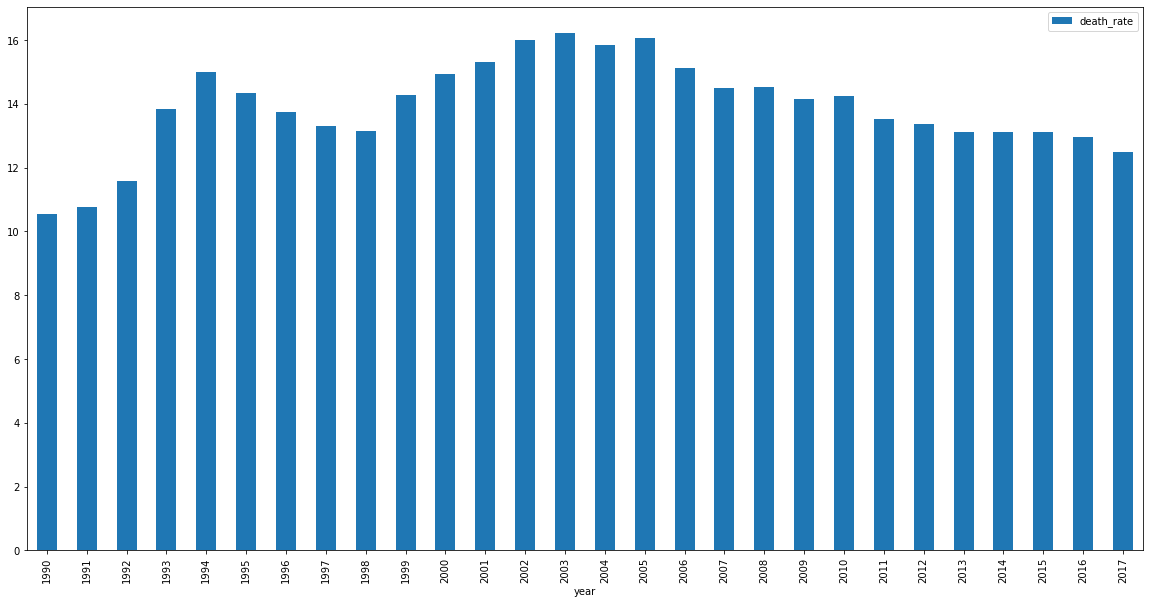

In [18]:
df.groupby(['year']).agg({'death_rate':'mean'}).plot.bar(figsize=(20,10))
plt.show()

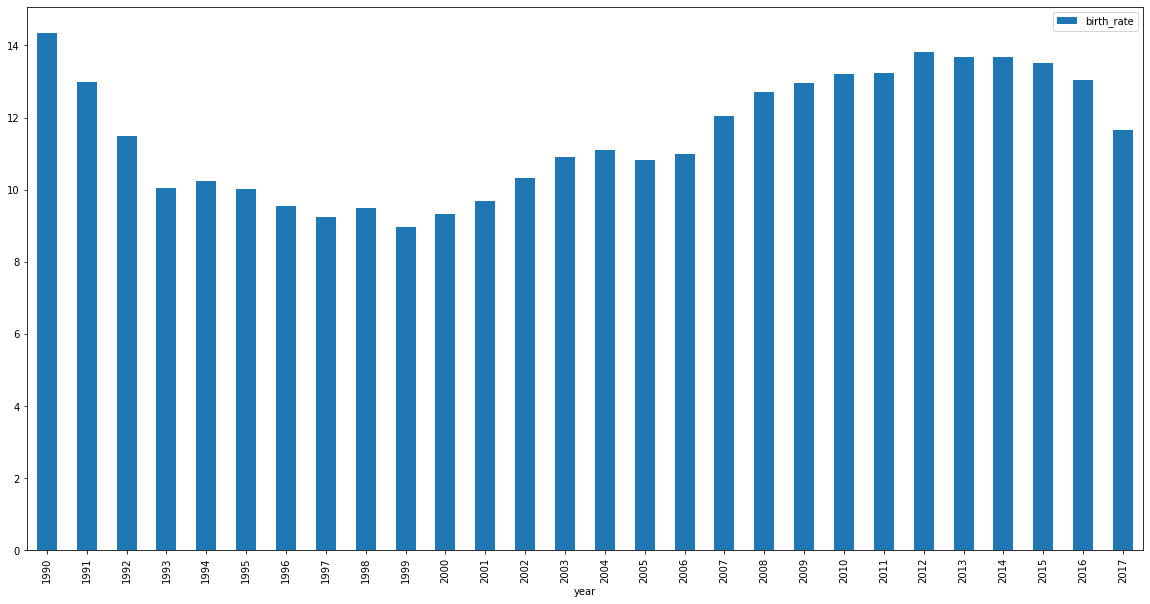

In [19]:
df.groupby(['year']).agg({'birth_rate':'mean'}).plot.bar(figsize=(20,10))
plt.show()

In [21]:
df['rate_diff'] = df['birth_rate'] - df['death_rate']

In [22]:
##Plotting the difference in the birth and death rate, which will show us an actual increase/decrease in the population
#over the years

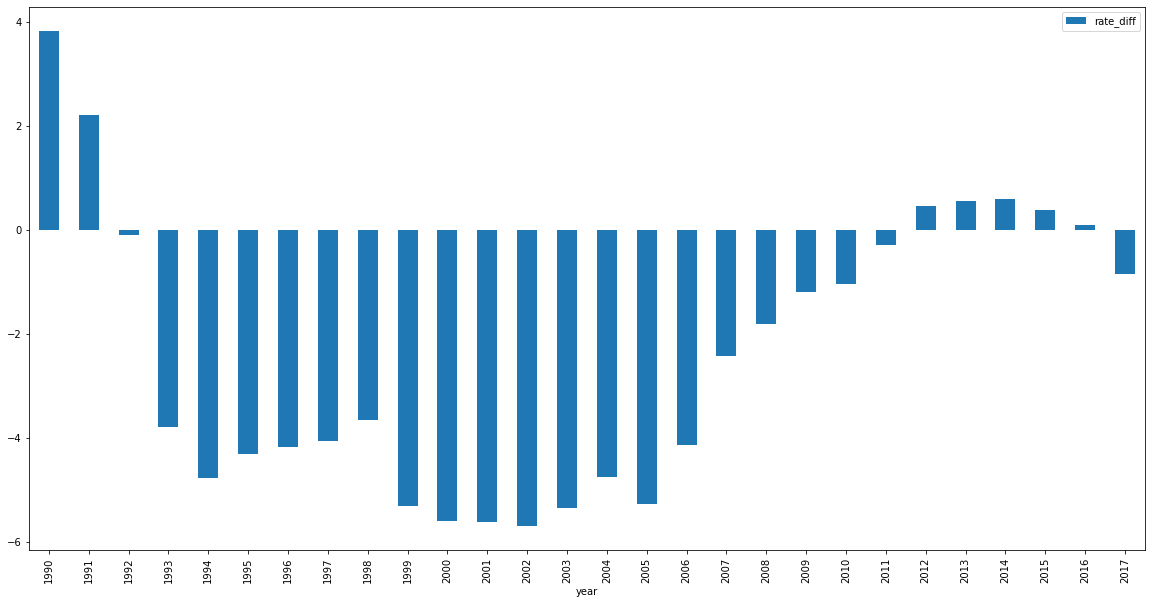

In [23]:
df.groupby(['year']).agg({'rate_diff':'mean'}).plot.bar(figsize=(20,10))
plt.show()

In [24]:
#After 1991, Russia's population has been on a huge decline.
##From 2012 to 2016 it started increasing a bit, but 2017 showed a decrease yet again

In [25]:
df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population,rate_diff
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0,1.9
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0,1.8
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0,7.6
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0,3.7
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0,4.7


In [26]:
#Now let's check the natural population growth per 1000 people

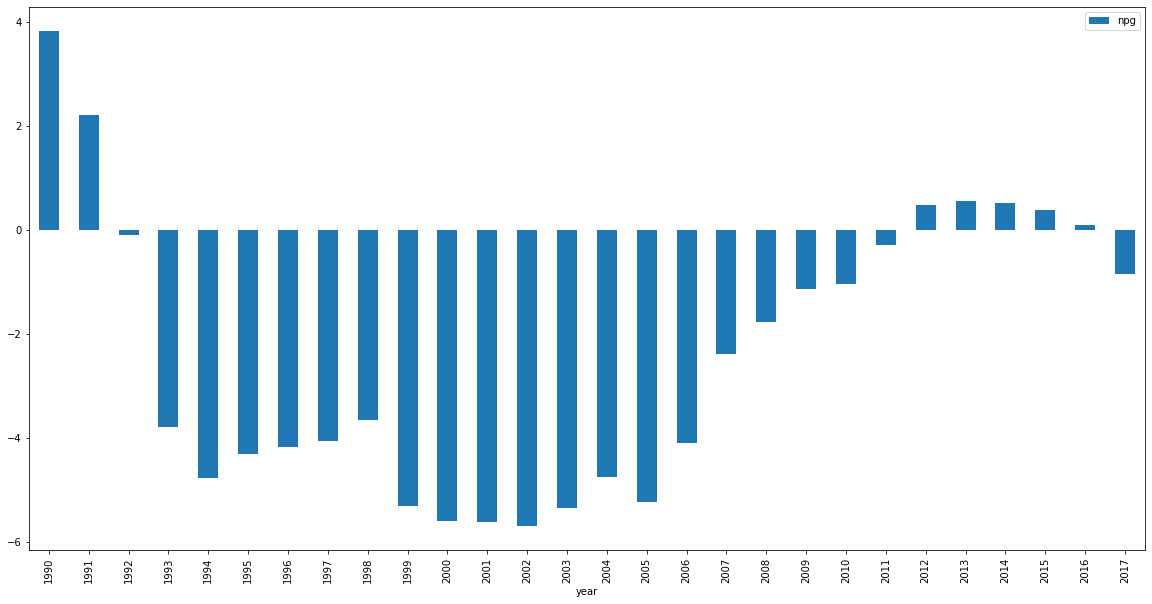

In [28]:
df.groupby(['year']).agg({'npg':'mean'}).plot.bar(figsize=(20,10))
plt.show()

In [29]:
##So, npg is same as rate_diff

In [30]:
#Let's check the same stats filtered by region

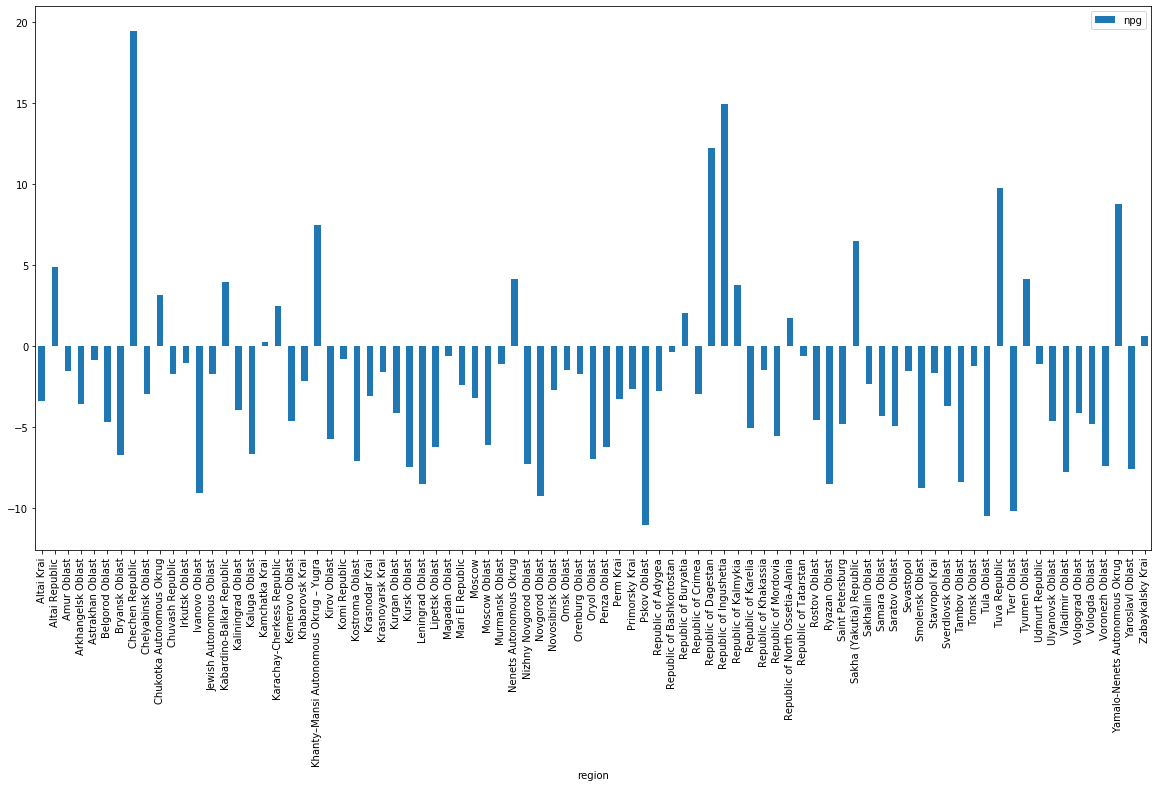

In [33]:
df.groupby(['region']).agg({'npg':'mean'}).plot.bar(figsize=(20,10))
plt.show()

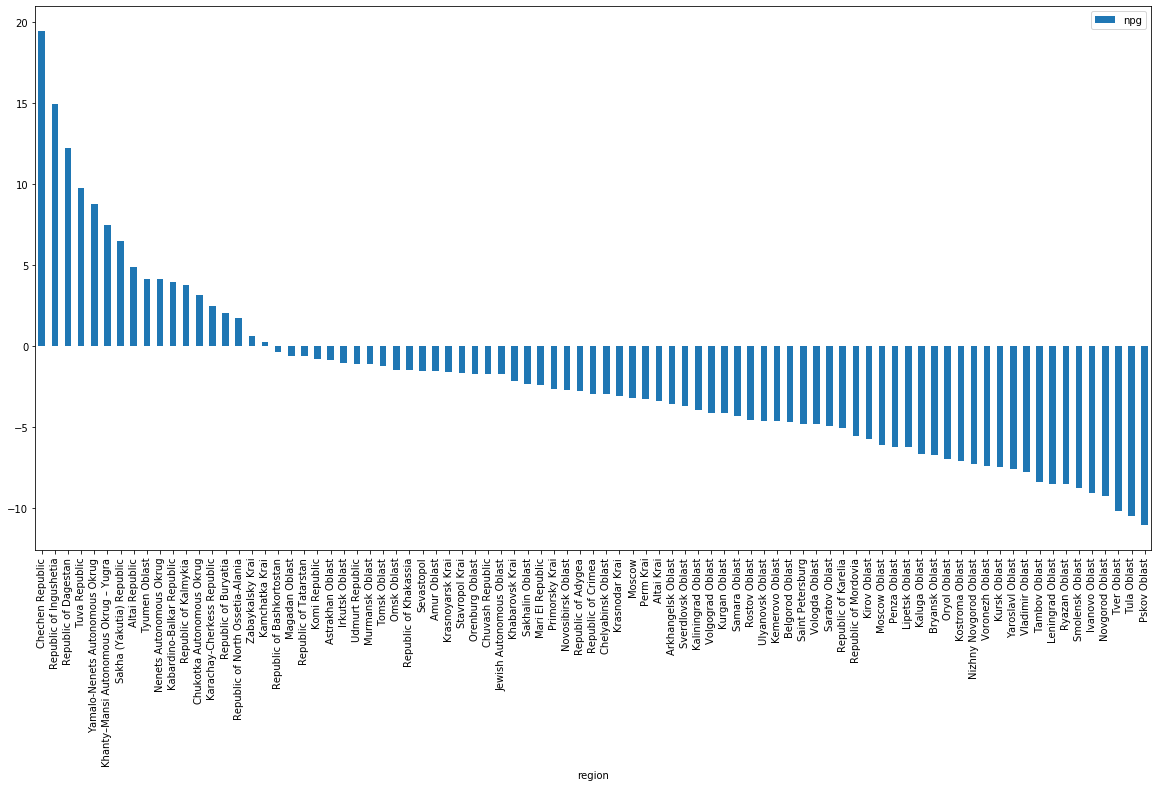

In [52]:
df.groupby(['region']).agg({'npg':'mean'}).sort_values(by='npg',ascending=False).plot.bar(figsize=(20,10))

In [53]:
##We can where the Population has increased in Russia, and where the population has decreased exteremely
#In Chenchen Republic, the population has increased extensively, whereas in Pskov Oblast, it has decreased exteremely
#A few places like Kamchakta Krai have had almost no effect of the change in population

In [54]:
df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population,rate_diff
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0,1.9
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0,1.8
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0,7.6
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0,3.7
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0,4.7


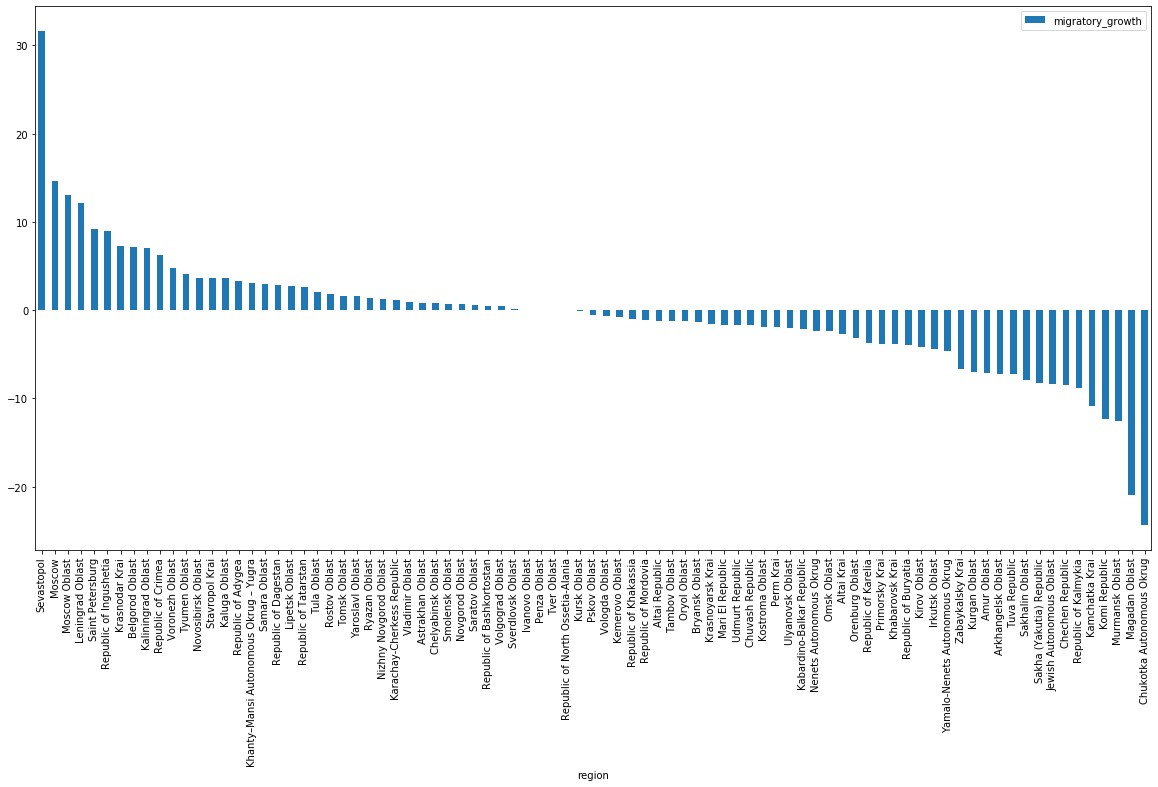

In [56]:
df.groupby(['region']).agg({'migratory_growth':'mean'}).sort_values(by='migratory_growth',ascending=False).plot.bar(figsize=(20,10))

In [61]:
df['migratory_growth'].isna().sum()/df.shape[0]

0.26512605042016807

In [62]:
##Since migratory has very few null values, let's check for all variables

In [63]:
df.isnull().sum()/df.shape[0]

year                0.000000
region              0.000000
npg                 0.026471
birth_rate          0.026471
death_rate          0.027311
migratory_growth    0.265126
population          0.020168
rate_diff           0.027311
dtype: float64

In [64]:
#Only migratory growth has so many nulls
#let's check how migratory growth is related to npg, then we can take a decision, to impute or remove nulls

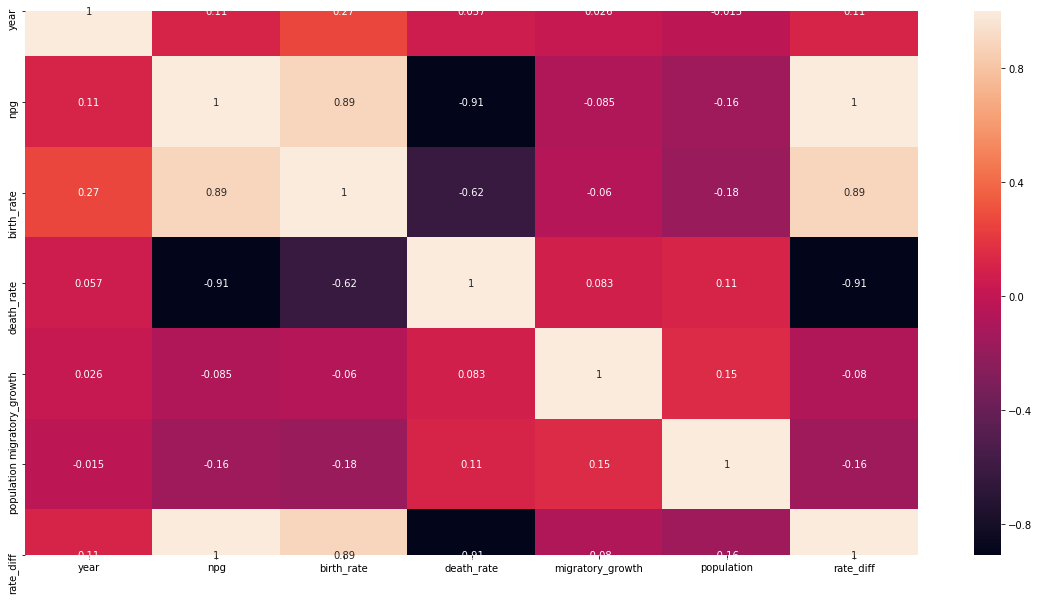

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [68]:
df = df.drop(columns='rate_diff')

In [69]:
##Death rate and NPG have high negative correlation, and that is perfectly valid

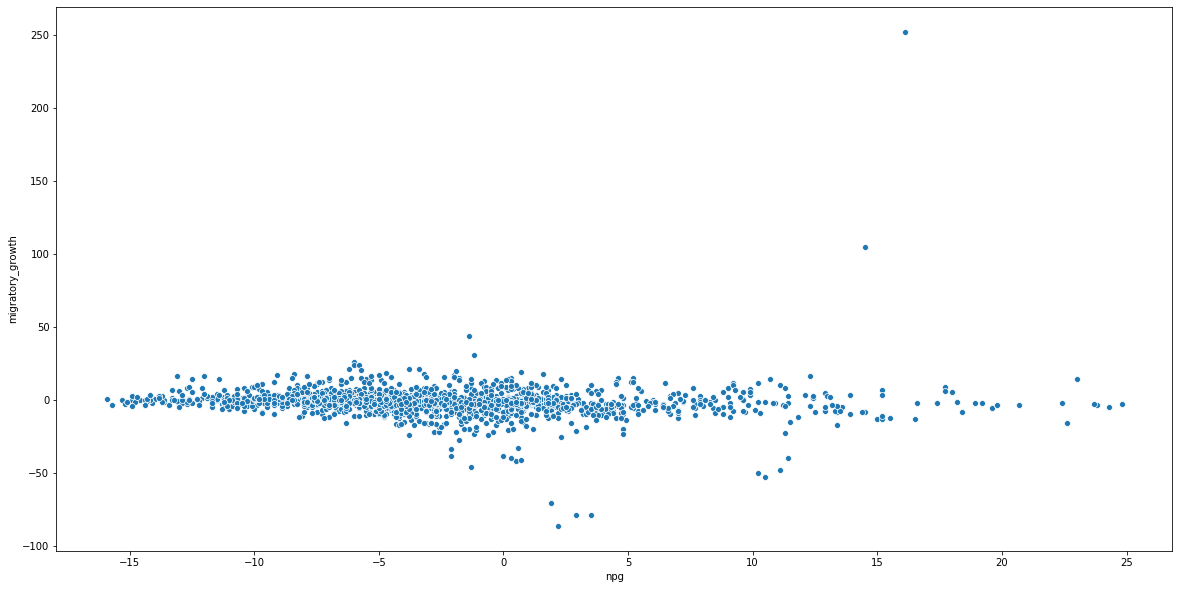

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='npg',y='migratory_growth')

In [74]:
##As per the above, we can actually impute migratory growth with the some value

In [80]:
df['migratory_growth'].median()

-0.705

In [81]:
#Median imputation seems fine for now

In [82]:
df['migratory_growth'].fillna(df['migratory_growth'].median(),inplace=True)

In [83]:
#Checking plots again

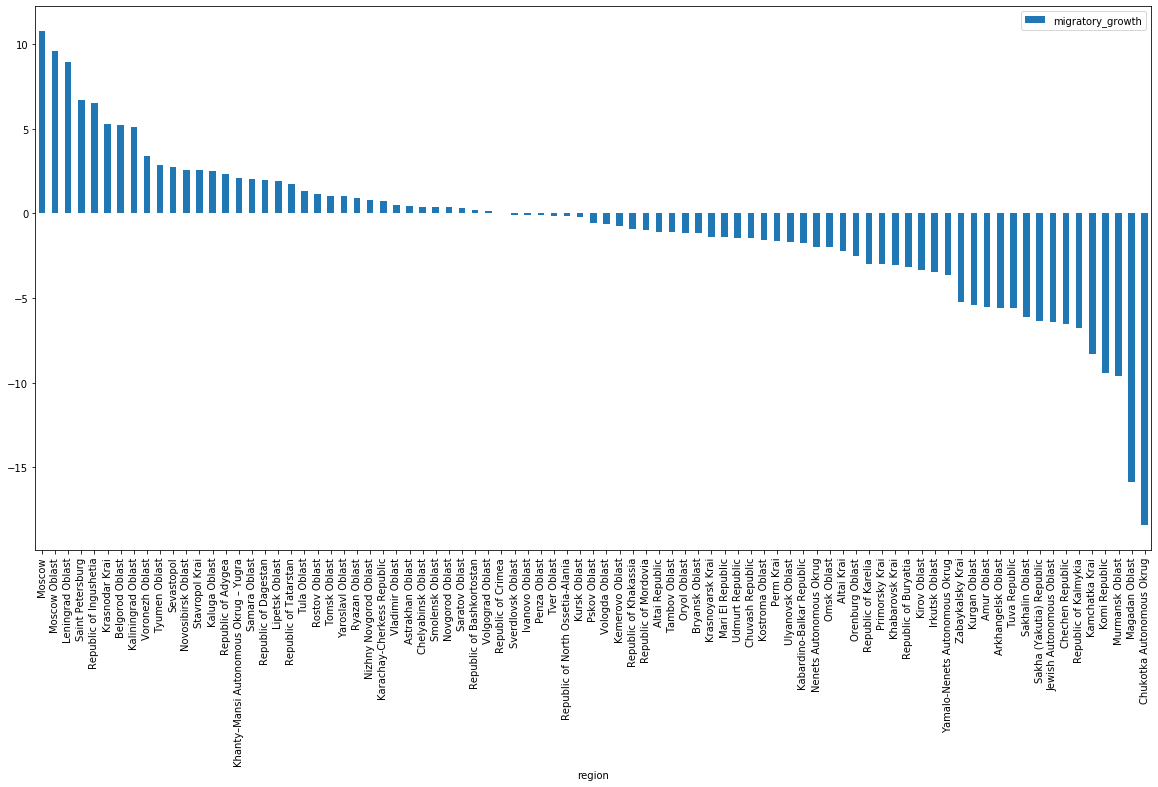

In [84]:
df.groupby(['region']).agg({'migratory_growth':'mean'}).sort_values(by='migratory_growth',ascending=False).plot.bar(figsize=(20,10))

In [85]:
##We see that the plot has changed, and it does show some obvious truths, because we understand that it is quite normal
#for people to shift to Moscow, it being the capital

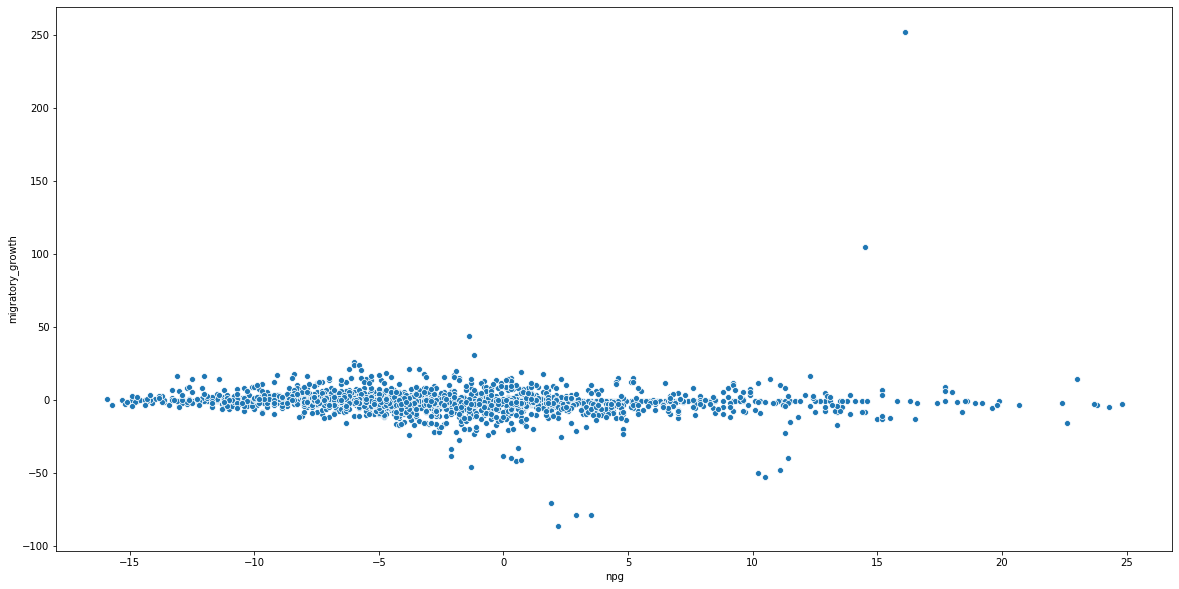

In [86]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='npg',y='migratory_growth')

In [87]:
##Scatter plot still looks almost the same, which means the pattern was preserved

In [88]:
#Let's check nulls again

In [89]:
df.isnull().sum()

year                 0
region               0
npg                 63
birth_rate          63
death_rate          65
migratory_growth     0
population          48
dtype: int64

In [90]:
##Also, we could one more thing, since the data is based on time

In [91]:
#We can impute using methods such as forward fill, so we will be doing that now

In [95]:
df = pd.read_csv('russian_demography.csv')

In [96]:
df.isnull().sum()

year                  0
region                0
npg                  63
birth_rate           63
death_rate           65
migratory_growth    631
population           48
dtype: int64

In [97]:
df.fillna(method='ffill',inplace=True)

In [99]:
df.isnull().sum()

year                  0
region                0
npg                   0
birth_rate            0
death_rate            0
migratory_growth    595
population            0
dtype: int64

In [100]:
##We will have to backfill for migratory_growth, because it starts with null itself

In [101]:
df = pd.read_csv('russian_demography.csv')

In [102]:
df.isnull().sum()

year                  0
region                0
npg                  63
birth_rate           63
death_rate           65
migratory_growth    631
population           48
dtype: int64

In [103]:
df['migratory_growth'].fillna(method='bfill',inplace=True)

In [104]:
df.isnull().sum()

year                 0
region               0
npg                 63
birth_rate          63
death_rate          65
migratory_growth     0
population          48
dtype: int64

In [105]:
df.fillna(method='ffill',inplace=True)

In [106]:
##Now, our data should be good enough for initial analysis

In [107]:
df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population
0,1990,Republic of Adygea,1.9,14.2,12.3,5.79,434788.0
1,1990,Altai Krai,1.8,12.9,11.1,5.79,2640419.0
2,1990,Amur Oblast,7.6,16.2,8.6,5.79,1055337.0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,5.79,1523509.0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,5.79,997516.0


In [108]:
##We can do one more thing, that is fill null values as per the regions. We will try that a bit later

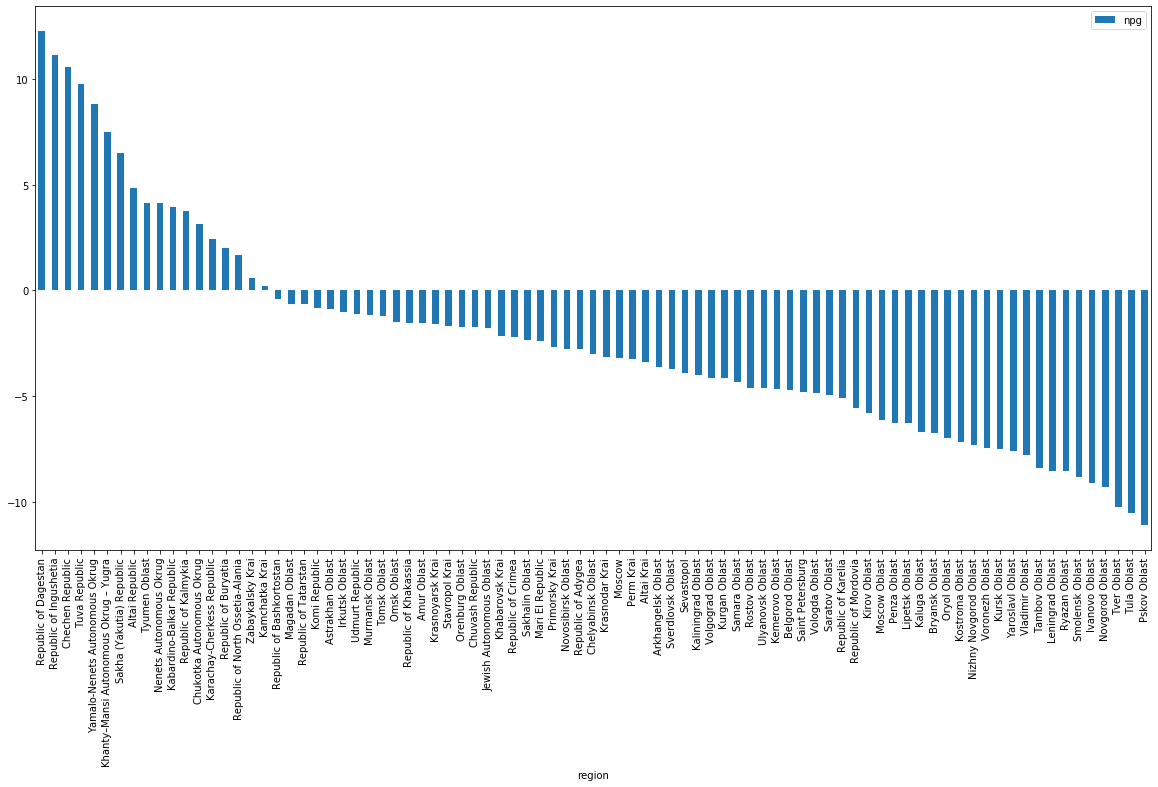

In [109]:
df.groupby(['region']).agg({'npg':'mean'}).sort_values(by='npg',ascending=False).plot.bar(figsize=(20,10))

In [110]:
##Now,this clearly shows that a few regions have been extensively occupied by people, and people have probably migrated from
#other regions, and isn't that very obvious in today's World?

In [111]:
##Let's check what happened over the years

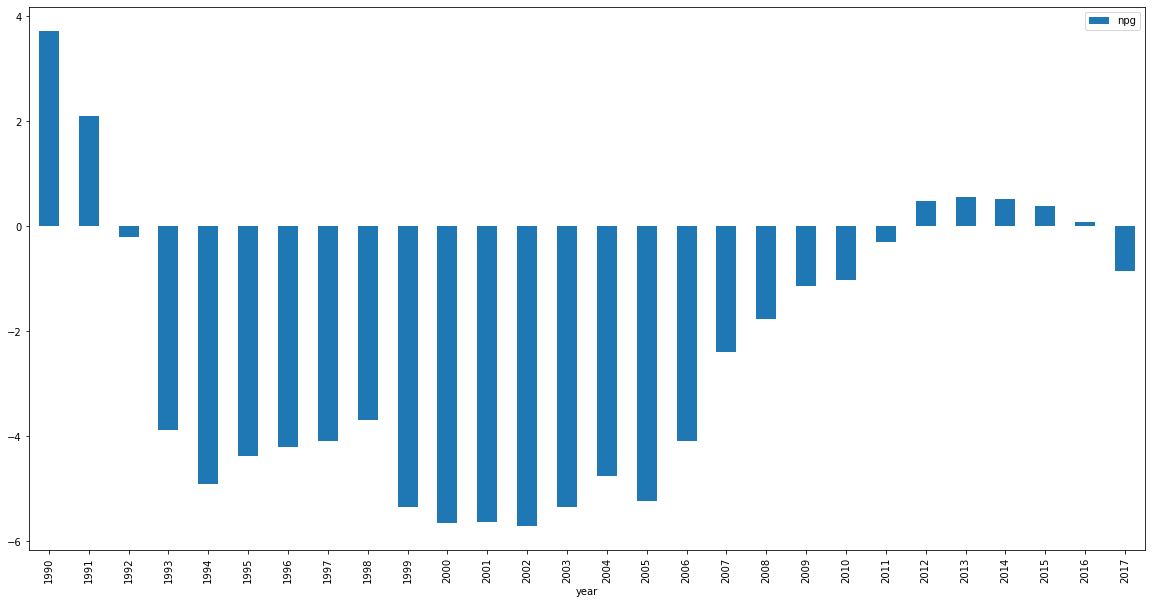

In [112]:
df.groupby(['year']).agg({'npg':'mean'}).plot.bar(figsize=(20,10))
plt.show()

In [113]:
##So, it is true that Russia's population has been on a decline lately

In [114]:
##Let's use a pairplot, to try to find out what effects what!

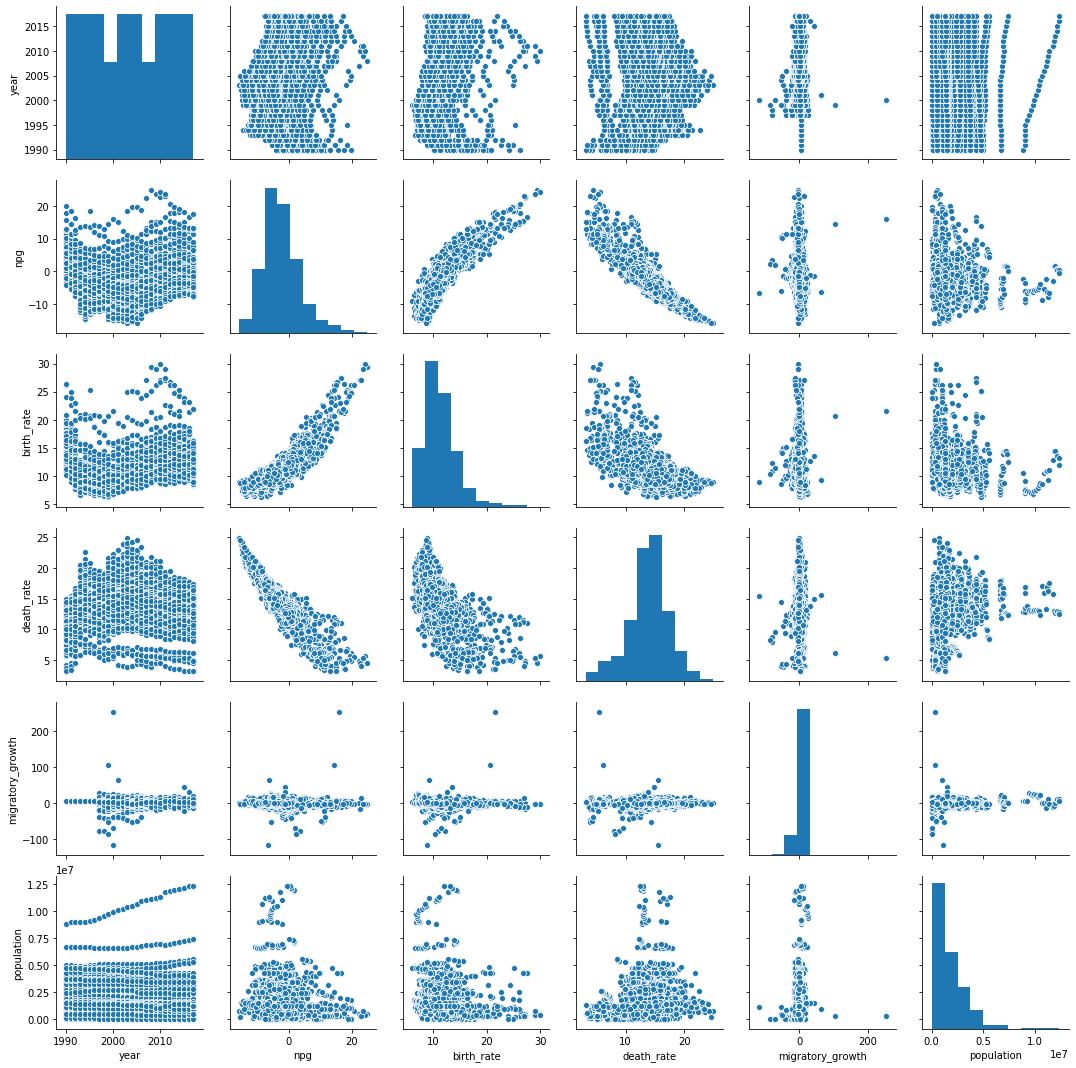

In [115]:
sns.pairplot(data=df)

In [ ]:
##We can see that migratory growth is basically a constant for most part of it, and quite obviously,
#npg is positively correlated to birth_rate and negatively to the death_rate